### Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import roc_auc_score,r2_dfore,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor 
from plotly.offline import iplot, init_notebook_mode
import pickle
import warnings
warnings.filterwarnings("ignore") 
import datetime as dt
from datetime import datetime
import plotly.express as px

### Loading Dataset

In [20]:
df=pd.read_csv('dataset.csv',encoding='latin1') 
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [21]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [23]:
np.sum(df.isna())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Removing null values

In [24]:
df['Customer Zipcode']=df['Customer Zipcode'].fillna(0) 
df['Order Zipcode']=df['Order Zipcode'].fillna(0)
df['Customer Fname']=df['Customer Fname'].fillna("NotDetermined")
df['Customer Full Name'] = df['Customer Fname'].astype(str)+df['Customer Lname'].astype(str)

### Data Cleaning

In [25]:
df=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1) 
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode,Customer Full Name
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks


In [26]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

<AxesSubplot:>

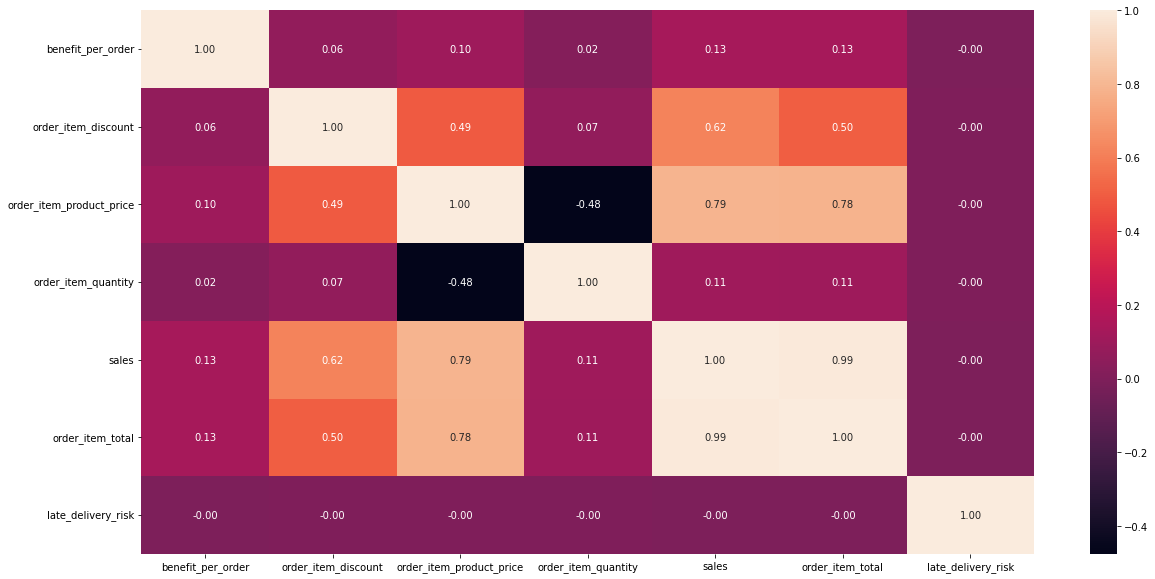

In [27]:
df_features=df[['shipping_date_dateorders', 'benefit_per_order',
       'order_date_dateorders',
       'order_item_discount', 
       'order_item_product_price', 
       'order_item_quantity', 'sales', 'order_item_total','late_delivery_risk']]
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_features.corr(), annot = True, fmt = '.2f')

### Data Visualising

In [28]:
Delivery=df.groupby('delivery_status')
Market = df.groupby('market') 
Region = df.groupby('order_region')
Customer=df.groupby('customer_segment')
Category=df.groupby('category_name')
Shipping=df.groupby('shipping_mode')
Region=df.groupby('order_region')

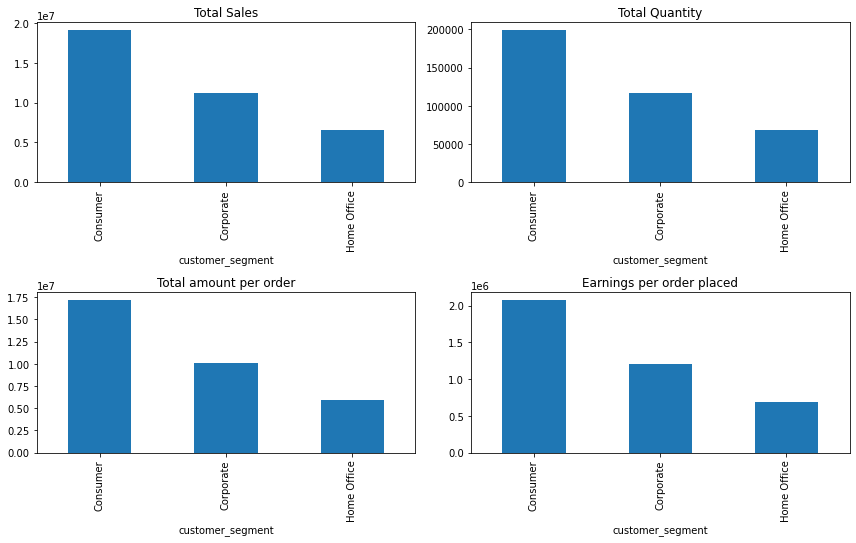

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Customer['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

plt.subplot(4, 2, 2)
Customer['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

plt.subplot(4, 2, 3)
Customer['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total amount per order")

plt.subplot(4, 2, 4)
Customer['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()
data_Customer_Segment=df.groupby(['customer_segment'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)

In [31]:
px.pie(data_Customer_Segment, values='order_item_quantity', names= 'customer_segment' , title= 'Number of Orders per Customer Segments', 
       color='customer_segment',
             color_discrete_map={'Consumer':'darkblue',
                                 'Corporate':'cyan',
                                 'Home Office':'royalblue'})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['Consumer'],
                                   ['Corporate'],
                                   ['Home Office']], dtype=object),
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'customer_segment=%{customdata[0]}<br>order_item_quantity=%{value}<extra></extra>',
              'labels': array(['Consumer', 'Corporate', 'Home Office'], dtype=object),
              'legendgroup': '',
              'marker': {'colors': ['darkblue', 'cyan', 'royalblue']},
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([93504, 54789, 32226], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Number of Orders per Customer Segments'}}
})

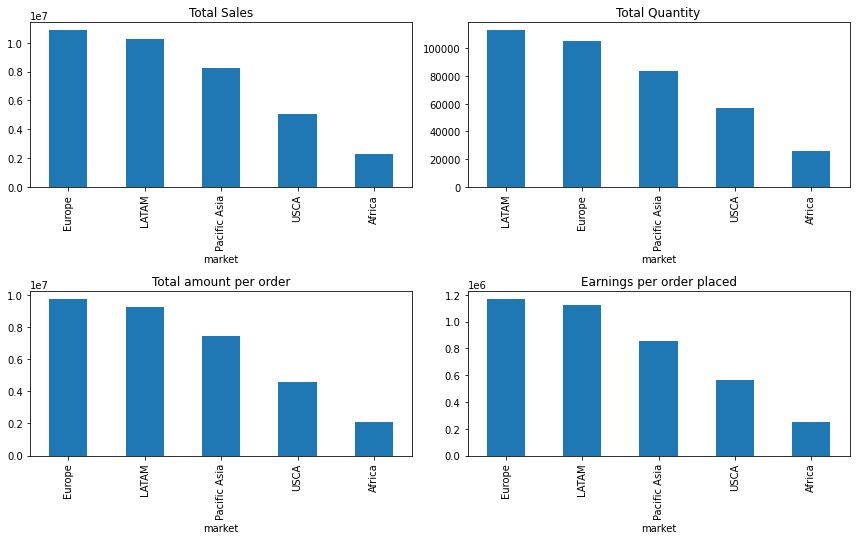

In [32]:
plt.figure(figsize=(8,8))
plt.subplot(4, 2, 1)
Market['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Sales")

plt.subplot(4, 2, 2)
Market['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Total Quantity")

plt.subplot(4, 2, 3)
Market['order_item_total'].sum().sort_values(ascending=False).plot.bar(figsize=(18,14), title="Total amount per order")

plt.subplot(4, 2, 4)
Market['benefit_per_order'].sum().sort_values(ascending=False).plot.bar(figsize=(12,14), title="Earnings per order placed")

plt.tight_layout()
plt.show()

data_Market=df.groupby(['market'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)

In [33]:
px.pie(data_Market, values='order_item_quantity', names= 'market' , title= 'Number of Orders per Market', 
       color='market',
             color_discrete_map={'Europe':'darkblue',
                                 'LATAM':'magenta',
                                 'Pacific Asia':'green',
                              'USCA':'yellow',
                                'Africa':'royalblue'})

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['LATAM'],
                                   ['Europe'],
                                   ['Pacific Asia'],
                                   ['USCA'],
                                   ['Africa']], dtype=object),
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'market=%{customdata[0]}<br>order_item_quantity=%{value}<extra></extra>',
              'labels': array(['LATAM', 'Europe', 'Pacific Asia', 'USCA', 'Africa'], dtype=object),
              'legendgroup': '',
              'marker': {'colors': ['magenta', 'darkblue', 'green', 'yellow', 'royalblue']},
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([51594, 50252, 41260, 25799, 11614], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Number of Orders per Market'}}
})

In [34]:
sales=Category['sales'].sum().sort_values(ascending=False)
sales

category_name
Fishing                 6.929654e+06
Cleats                  4.431943e+06
Camping & Hiking        4.118426e+06
Cardio Equipment        3.694843e+06
Women's Apparel         3.147800e+06
Water Sports            3.113845e+06
Men's Footwear          2.891758e+06
Indoor/Outdoor Games    2.888994e+06
Shop By Sport           1.309522e+06
Computers               6.630000e+05
Electronics             3.710346e+05
Cameras                 2.676077e+05
Garden                  2.577687e+05
Children's Clothing     2.328292e+05
Crafts                  2.233563e+05
Girls' Apparel          1.517062e+05
Women's Clothing        1.402830e+05
Accessories             1.336715e+05
Sporting Goods          1.170068e+05
Golf Gloves             1.166954e+05
Music                   1.131221e+05
Consumer Electronics    1.089913e+05
Golf Shoes              1.079980e+05
Health and Beauty       1.060805e+05
Kids' Golf Clubs        9.879758e+04
Baseball & Softball     9.405715e+04
Boxing & MMA            

Total Revenue with orders 7850450.319819024


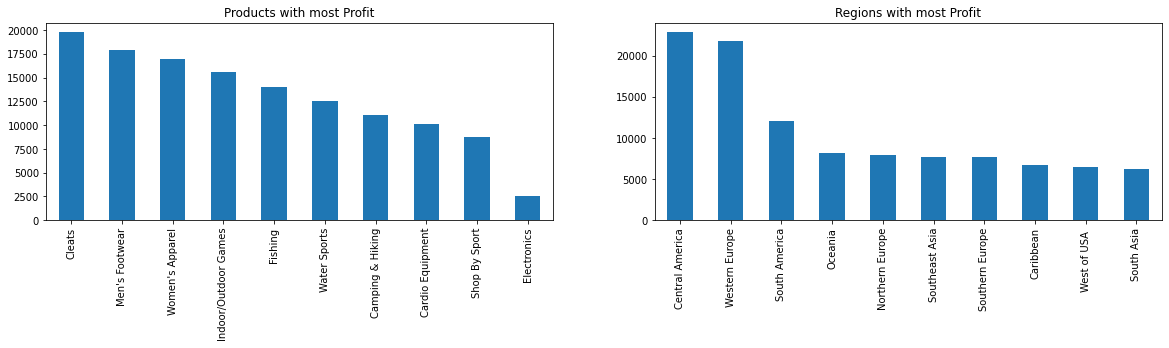

In [35]:
Revenue = df[(df['benefit_per_order']>0)]
plt.figure(figsize=(10,12))
plt.subplot(2, 2, 1)
Revenue['category_name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most Profit")
plt.subplot(2, 2, 2)
Revenue['order_region'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Regions with most Profit")
print('Total Revenue with orders',Revenue['benefit_per_order'].sum())#Sum of total sales which are Profit

In [36]:
data_Shippment=df.groupby(['shipping_mode'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Shippment, values='order_item_quantity', names= 'shipping_mode' , title= 'Shippment Modes', 
       color='shipping_mode',
             color_discrete_map={'First Class':'darkblue',
                                 'Same Day':'cyan',
                                 'Second Class':'magenta',
                              'Standard Class':'green'})


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['Standard Class'],
                                   ['Second Class'],
                                   ['First Class'],
                                   ['Same Day']], dtype=object),
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'shipping_mode=%{customdata[0]}<br>order_item_quantity=%{value}<extra></extra>',
              'labels': array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
                              dtype=object),
              'legendgroup': '',
              'marker': {'colors': ['green', 'magenta', 'darkblue', 'cyan']},
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([107752,  35216,  27814,   9737], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Shippment Modes'}}
})

In [37]:
data_Payment=df.groupby(['type'])['order_id'].count().reset_index(name='order_item_quantity').sort_values(by= 'order_item_quantity', ascending= False)
px.pie(data_Payment, values='order_item_quantity', names= 'type' , title= 'Payment Methods', 
       color='type',
             color_discrete_map={'CASH':'darkblue',
                                 'DEBIT':'magenta',
                                 'PAYMENT':'green',
                              'TRANSFER':'yellow'})


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([['DEBIT'],
                                   ['TRANSFER'],
                                   ['PAYMENT'],
                                   ['CASH']], dtype=object),
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'type=%{customdata[0]}<br>order_item_quantity=%{value}<extra></extra>',
              'labels': array(['DEBIT', 'TRANSFER', 'PAYMENT', 'CASH'], dtype=object),
              'legendgroup': '',
              'marker': {'colors': ['magenta', 'yellow', 'green', 'darkblue']},
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([69295, 49883, 41725, 19616], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Payment Methods'}}
})